In [9]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [82]:
import pandas as pd
import numpy as np
from nltk.corpus import wordnet as wn
import gensim 
from gensim.models import Word2Vec 

In [85]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [84]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [90]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [87]:
"without" in stop_words

False

In [36]:
nltk.pos_tag(nltk.word_tokenize("Displacement"))[0]

('Displacement', 'NN')

In [2]:
df_X = pd.read_csv("data/diabetes/diab_train.csv", skiprows=0, header=None)

In [3]:
X = np.asarray(df_X)

In [8]:
X[0,-3]

'diag_1_desc'

In [67]:
breakers = ['and', 'and/or', 'or', 'by', 'in', 'with', 'without', ',', 'due']

In [68]:
adjs = []
condition = []

for x in X[1:, -3]:
    j = 0
    words = nltk.word_tokenize(str(x))
    if nltk.pos_tag(words[0])[0][1] == 'NNP':
        adjs.append(words[0])
        j = 1
    i = j
    while i < len(words) and words[i] not in breakers:
        i += 1
    condition.append(words[j:i])

In [71]:
for i in range(len(X[1:])):
    print(adjs[i],"|", X[i+1, -3])

Malignant | Acute pericarditis in diseases classified elsewhere
Urinary | Malignant essential hypertension
Respiratory | Urinary tract infection, site not specified
Coronary | Respiratory abnormality, unspecified
Cerebral | Coronary atherosclerosis of unspecified type of vessel, native or graft
Hyperosmolality | Cerebral thrombosis without mention of cerebral infarction
Closed | Acquired hypertrophic pyloric stenosis
Bipolar | Basilar artery syndrome
Simple | Hyperosmolality and/or hypernatremia
Pulmonary | Closed fracture of acetabulum
Coronary | Bipolar I disorder, single manic episode, unspecified
Subarachnoid | Simple chronic bronchitis
Simple | Pulmonary collapse
Closed | Coronary atherosclerosis of unspecified type of vessel, native or graft
Pleurisy | Subarachnoid hemorrhage following injury without mention of open intracranial wound, unspecified state of consciousness
Rheumatism | Simple chronic bronchitis
Cerebral | Closed fracture of clavicle, unspecified part
Orthostatic | P

Coronary | Acute and subacute bacterial endocarditis
Benign | Drug withdrawal
Migraine | Alteration of consciousness
Coronary | Coronary atherosclerosis of unspecified type of vessel, native or graft
Postoperative | Cellulitis and abscess of face
Pneumonia | Cerebral thrombosis without mention of cerebral infarction
Diabetes | Congestive heart failure, unspecified
Hematemesis | Coronary atherosclerosis of unspecified type of vessel, native or graft
Streptococcal | Mechanical complication of unspecified cardiac device, implant, and graft
Osteoarthrosis | Alteration of consciousness
Nausea | Diabetes with other specified manifestations, type II or unspecified type, not stated as uncontrolled
Postmyocardial | Intussusception
Diabetes | Alzheimer's disease
Extrinsic | Carcinoma in situ of breast
Diabetes | Hyperosmolality and/or hypernatremia
Diabetes | Coronary atherosclerosis of unspecified type of vessel, native or graft
Closed | Alteration of consciousness
Osteoarthrosis | Congestive h

Lesion | Acute kidney failure
Synovitis | Respiratory abnormality, unspecified
Congestive | Rheumatoid arthritis
Diabetes | Alteration of consciousness
Congestive | Cellulitis and abscess of face
Spontaneous | Diabetes with neurological manifestations, type II or unspecified type, not stated as uncontrolled
Empyema | Diabetes with neurological manifestations, type II or unspecified type, not stated as uncontrolled
Pneumonia | Streptococcal septicemia
Diabetes | Diabetes with other specified manifestations, type II or unspecified type, uncontrolled
Pneumonitis | Fracture of medial malleolus, closed
Displacement | Malignant essential hypertension
Respiratory | Mitral valve disorders
Cerebral | Acute myocardial infarction of anterolateral wall, episode of care unspecified
Disorders | Congestive heart failure, unspecified
Pneumonia | Abdominal pain, unspecified site
Congestive | Diabetes mellitus without mention of complication, type I [juvenile type], uncontrolled
Nontraumatic | Care invo

Congestive | Pressure ulcer, unspecified site
Pneumonia | Pneumonia, organism unspecified
Congestive | Congestive heart failure, unspecified
Obesity | Respiratory abnormality, unspecified
Diabetes | Acute myocardial infarction of anterolateral wall, episode of care unspecified
Mechanical | Occlusion and stenosis of basilar artery without mention of cerebral infarction
Extrinsic | Hyperosmolality and/or hypernatremia
Spinal | Diabetes mellitus without mention of complication, type II or unspecified type, uncontrolled
Hematemesis | Pneumonia, organism unspecified
Osteoarthrosis | Acute kidney failure
Cerebral | Diverticulosis of small intestine (without mention of hemorrhage)
Hyperosmolality | Intestinal infection due to E. coli, unspecified
Congestive | Respiratory abnormality, unspecified
Hypertensive | Coronary atherosclerosis of unspecified type of vessel, native or graft
Other | Pneumonia, organism unspecified
Displacement | Paroxysmal supraventricular tachycardia
Coronary | Coronar

IndexError: list index out of range

In [72]:
len(adjs)

4411

In [75]:
len(set(adjs))

170

In [93]:
diagnoses = list(set(X[1:,-3])|set(X[1:,-2])|set(X[1:,-1]))

In [104]:
[lem.lemmatize(w) for w in tokenizer.tokenize(str(diagnoses[0])) if not w in stop_words]

['nan']

In [105]:
diags = []
for d in diagnoses:
    diags.append([lem.lemmatize(w) for w in tokenizer.tokenize(str(d)) if not w in stop_words])

In [120]:
w2v = Word2Vec(diags, min_count=1)

In [124]:
print(list(w2v.wv.vocab))

['nan', 'Anal', 'rectal', 'polyp', 'Malignant', 'neoplasm', 'vagina', 'Extrinsic', 'asthma', 'unspecified', 'Diabetes', 'neurological', 'manifestation', 'type', 'II', 'stated', 'uncontrolled', 'Leukoplakia', 'penis', 'Adrenal', 'cortical', 'steroid', 'causing', 'adverse', 'effect', 'therapeutic', 'use', 'Abrasion', 'friction', 'burn', 'face', 'neck', 'scalp', 'except', 'eye', 'without', 'mention', 'infection', 'corpus', 'uterus', 'isthmus', 'Family', 'history', 'psychiatric', 'condition', 'Poisoning', 'adrenal', 'Fall', 'resulting', 'striking', 'sharp', 'object', 'Open', 'wound', 'hip', 'thigh', 'complication', 'Acute', 'ill', 'defined', 'cerebrovascular', 'disease', 'Fracture', 'medial', 'malleolus', 'closed', 'Seminal', 'vesiculitis', 'Adenovirus', 'classified', 'elsewhere', 'site', 'coma', 'finger', 'ketoacidosis', 'I', 'juvenile', 'oxazolidine', 'derivative', 'Intracerebral', 'hemorrhage', 'Postcholecystectomy', 'syndrome', 'Closed', 'fracture', 'clavicle', 'part', 'Other', 'unknow

In [122]:
from sklearn.manifold import TSNE

In [ ]:
TSNE(n_components=2).fit_transform(X)

In [130]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [133]:
X = w2v[w2v.wv.vocab]
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
result = pca.fit_transform(X)
result2 = tsne.fit_transform(X)

/home/vescovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


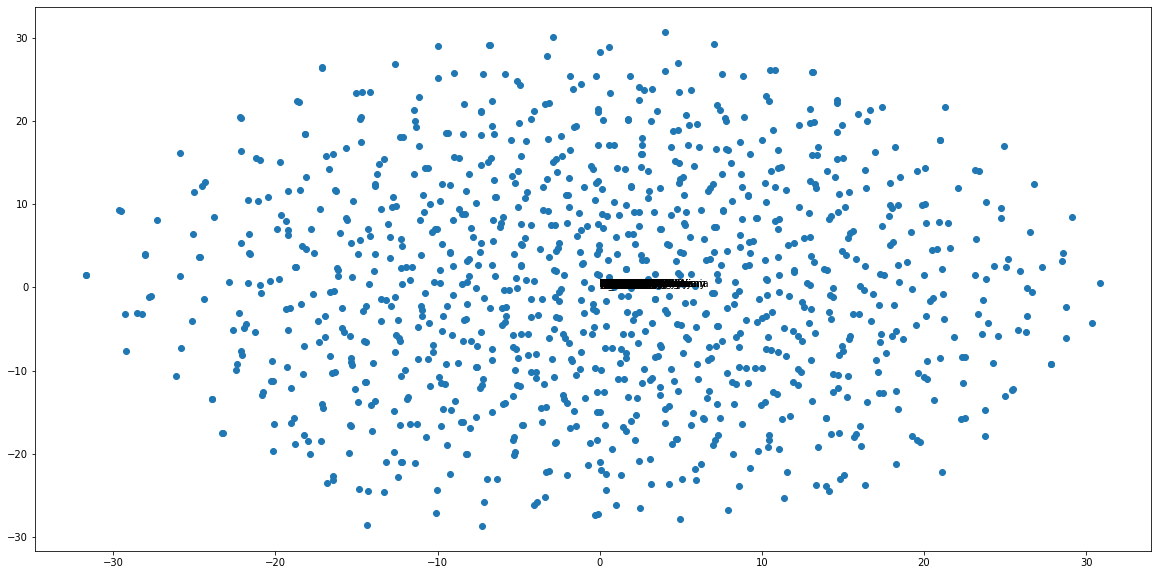

In [134]:
plt.figure(figsize=(20,10))
plt.scatter(result2[:, 0], result2[:, 1])
words = list(w2v.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [136]:
print(X.shape)

(1057, 100)
